## Project Description
* This project focuses on Customer Segmentation for a retail business, leveraging K-means clustering to categorize customers based on Annual Income and Spending Score. Our goal is to identify distinct customer segments that exhibit similar spending behaviors, income levels, and age demographics, enabling more targeted and effective marketing strategies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mall_df= pd.read_csv("/content/drive/MyDrive/K-Means_Clustering/mall_customers.csv")

In [ ]:
mall_df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


### One-Hot Encoding
* One-Hot Encoding creates binary columns for each category in the categorical feature. This method is often preferred for non-ordinal data, as it doesn't imply any ordering among categories.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Strip whitespace from column names
mall_df.columns = mall_df.columns.str.strip()

# Initialize OneHotEncoder without sparse parameter
encoder = OneHotEncoder(drop='first')

# Fit the encoder to the categorical columns
X = mall_df[['Gender', 'Education', 'Marital Status']]
one_hot_encoded_data = encoder.fit_transform(X)

# Convert to DataFrame for better readability
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=encoder.get_feature_names_out())

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
mall_df_encoded = pd.concat([mall_df.drop(['Gender', 'Education', 'Marital Status'], axis=1), one_hot_encoded_df], axis=1)

# Display the One-Hot Encoded Data
print("One-Hot Encoded Data:")
mall_df_encoded.head()

One-Hot Encoded Data:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_M,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,1,19,15,39,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,21,15,81,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,20,16,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,23,16,77,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,31,17,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Standardization
* This method centers the data around the mean with a standard deviation of 1, transforming the data into a distribution with a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (excluding the CustomerID)
features = mall_df_encoded.drop(columns=['CustomerID'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
standardized_features = scaler.fit_transform(features)

# Convert the standardized features back to a DataFrame for easier handling
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

# Display the standardized DataFrame
print("Standardized Data:")
standardized_df.head()


Standardized Data:


,Age,Annual Income (k$),Spending Score (1-100),Gender_M,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Married,Marital Status_Single,Marital Status_Unknown
0,-1.424569,-1.738999,-0.434801,1.128152,-0.241249,-0.709760,2.0,-0.204124,-0.428290,-0.386556,0.886405,-0.662457,-0.284747
1,-1.281035,-1.738999,1.195704,1.128152,-0.241249,1.408927,-0.5,-0.204124,-0.428290,-0.386556,-1.128152,1.509533,-0.284747
2,-1.352802,-1.700830,-1.715913,-0.886405,-0.241249,1.408927,-0.5,-0.204124,-0.428290,-0.386556,0.886405,-0.662457,-0.284747
3,-1.137502,-1.700830,1.040418,-0.886405,-0.241249,-0.709760,2.0,-0.204124,-0.428290,-0.386556,-1.128152,-0.662457,3.511885
4,-0.563369,-1.662660,-0.395980,-0.886405,-0.241249,-0.709760,-0.5,-0.204124,2.334869,-0.386556,0.886405,-0.662457,-0.284747


### Feature Selection:
* You can focus on the following features for your K-means clustering:

1. Age
2. Annual Income (k$)
3. Spending Score (1-100)

* Prepare the Feature Set: Extract the selected features from the standardized dataset.
* Apply K-means Clustering: Choose the number of clusters, fit the K-means model, and predict the cluster assignments.

In [ ]:
from sklearn.cluster import KMeans

# Select the features for clustering
features = mall_df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Applying K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(features)

# Adding the cluster labels to the original DataFrame
mall_df_encoded['Cluster'] = clusters

mall_df_encoded.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_M,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Cluster
0,1,19,15,39,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,2,21,15,81,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,20,16,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,4,23,16,77,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,5,31,17,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2


### Use the Elbow Method to determine the optimal number of clusters.

   Number of clusters (k)           WCSS
0                       1  308812.780000
1                       2  221087.196272
2                       3  158744.971080
3                       4  104366.151456
4                       5   97211.843540
5                       6   68275.944286
6                       7   51448.361263
7                       8   44640.028049
8                       9   42081.855309
9                      10   38378.738908


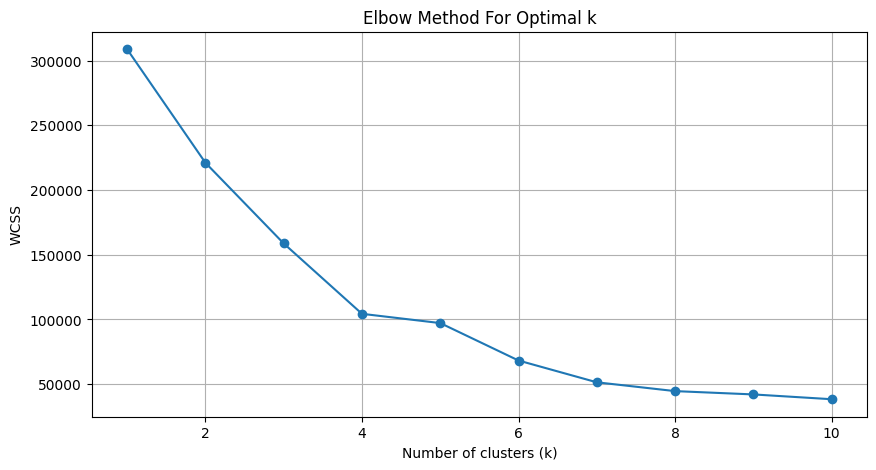

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List to hold WCSS values for different values of k
wcss = []

# Test k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)  # WCSS is the inertia attribute

# Create a DataFrame to display k and its corresponding WCSS
elbow_df = pd.DataFrame({'Number of clusters (k)': range(1, 11), 'WCSS': wcss})

# Print the DataFrame
print(elbow_df)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


### Let's run the K-Means algorithm for both k=5 and k=6, analyze the resulting clusters, and inspect the cluster centers.

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters
k_values = [5, 6]
cluster_results = {}

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)


    mall_df_scaled = mall_df_encoded.drop(columns=['CustomerID', 'Cluster'])
    kmeans.fit(mall_df_scaled)


    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    # Store results in the dictionary
    cluster_results[k] = {
        'labels': cluster_labels,
        'centers': cluster_centers
    }


for k in cluster_results:
    print(f"\nCluster Centers for k={k}:")
    print(cluster_results[k]['centers'])



Cluster Centers for k=5:
[[ 4.62134831e+01  4.77191011e+01  4.17977528e+01  3.82022472e-01
   7.86516854e-02  3.25842697e-01  1.91011236e-01  4.49438202e-02
   1.23595506e-01  1.57303371e-01  5.28089888e-01  3.25842697e-01
   8.98876404e-02]
 [ 3.24545455e+01  1.08181818e+02  8.27272727e+01  4.54545455e-01
   9.09090909e-02  2.72727273e-01  9.09090909e-02  9.09090909e-02
   2.72727273e-01  2.77555756e-17  7.27272727e-01  1.81818182e-01
   9.09090909e-02]
 [ 2.46896552e+01  2.95862069e+01  7.36551724e+01  4.82758621e-01
   3.44827586e-02  3.79310345e-01  2.06896552e-01 -1.38777878e-17
   1.03448276e-01  2.06896552e-01  5.86206897e-01  2.41379310e-01
   1.37931034e-01]
 [ 4.03947368e+01  8.70000000e+01  1.86315789e+01  5.26315789e-01
   2.63157895e-02  2.89473684e-01  2.63157895e-01  5.26315789e-02
   2.36842105e-01  2.63157895e-02  6.05263158e-01  3.15789474e-01
   2.63157895e-02]
 [ 3.17878788e+01  7.60909091e+01  7.77575758e+01  4.54545455e-01
   3.03030303e-02  3.93939394e-01  1.818

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


scaler = StandardScaler()
mall_df_encoded[features] = scaler.fit_transform(mall_df_encoded[features])


kmeans_5 = KMeans(n_clusters=5, random_state=42)
mall_df_encoded['Cluster_k5'] = kmeans_5.fit_predict(mall_df_encoded[features])


kmeans_6 = KMeans(n_clusters=6, random_state=42)
mall_df_encoded['Cluster_k6'] = kmeans_6.fit_predict(mall_df_encoded[features])


mall_df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_M,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Cluster,Cluster_k5,Cluster_k6
0,1,-1.424569,-1.738999,-0.434801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,2
1,2,-1.281035,-1.738999,1.195704,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,2
2,3,-1.352802,-1.700830,-1.715913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3,5
3,4,-1.137502,-1.700830,1.040418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2
4,5,-0.563369,-1.662660,-0.395980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,2,5


In [ ]:
print(mall_df_encoded.columns)


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_M', 'Education_Doctorate', 'Education_Graduate',
       'Education_High School', 'Education_Post-Graduate',
       'Education_Uneducated', 'Education_Unknown', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Unknown', 'Cluster',
       'Cluster_k5', 'Cluster_k6'],
      dtype='object')


In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Function to plot clusters
def plot_clusters(data, cluster_column, k):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                    hue=cluster_column, palette='viridis', s=100, alpha=0.7, edgecolor='w')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()



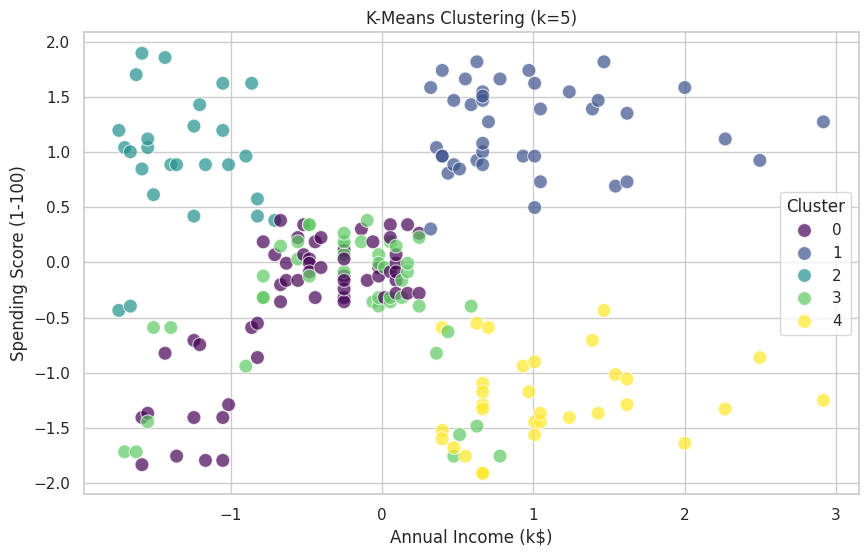

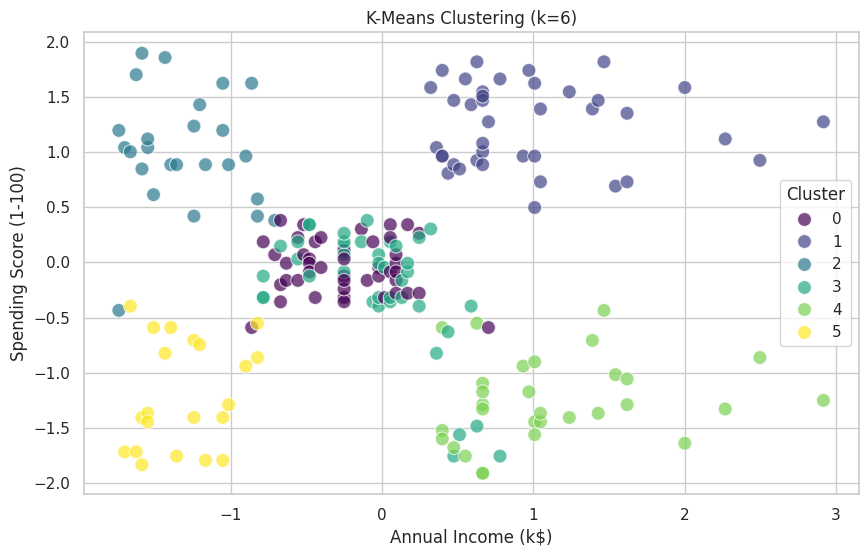

In [ ]:
# Plot clusters for k=5
plot_clusters(mall_df_encoded, 'Cluster_k5', 5)

# Plot clusters for k=6
plot_clusters(mall_df_encoded, 'Cluster_k6', 6)

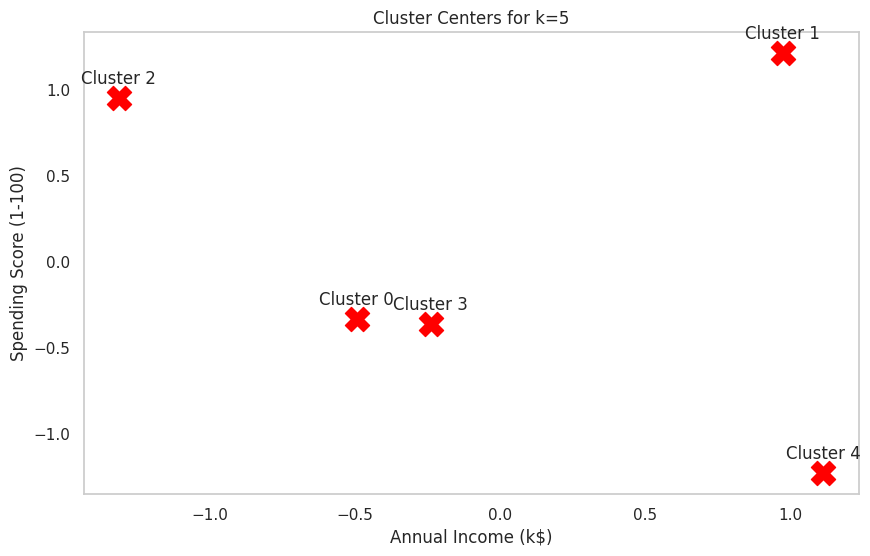

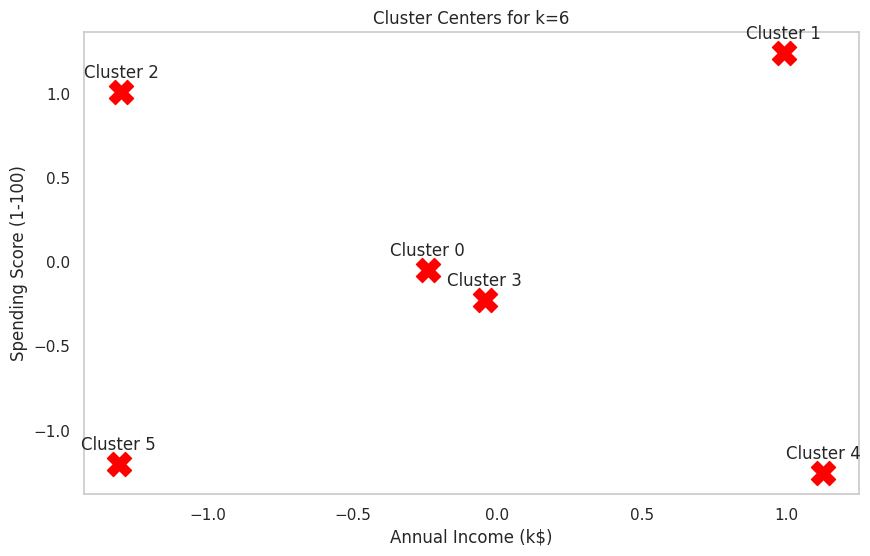

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cluster_centers(centers, k, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(centers[:, 1], centers[:, 2], s=300, c='red', marker='X')  # Annual Income vs. Spending Score
    plt.title(f'Cluster Centers for k={k}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')

    for i in range(k):
        plt.annotate(f'Cluster {i}', (centers[i, 1], centers[i, 2]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.grid()
    plt.show()

# Plot cluster centers
plot_cluster_centers(kmeans_5.cluster_centers_, 5, 'Cluster Centers for k=5')
plot_cluster_centers(kmeans_6.cluster_centers_, 6, 'Cluster Centers for k=6')


In [ ]:
mall_df_encoded.to_csv('mall_cluster.csv')

In [ ]:
mall_df_encoded.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_M,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Marital Status_Married,Marital Status_Single,Marital Status_Unknown,Cluster,Cluster_k5,Cluster_k6
0,1,-1.424569,-1.738999,-0.434801,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,2
1,2,-1.281035,-1.738999,1.195704,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2,2
2,3,-1.352802,-1.700830,-1.715913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,3,5
3,4,-1.137502,-1.700830,1.040418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2
4,5,-0.563369,-1.662660,-0.395980,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,2,5


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming `X` is your standardized data
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(X)

# Calculate Silhouette Score
silhouette_avg_6 = silhouette_score(X, kmeans_6.labels_)
print(f"Silhouette Score for k=6: {silhouette_avg_6}")



ValueError: could not convert string to float: 'M'

### Retrieving the original, non-standardized values alongside the cluster assignments is a good idea for interpreting the results and generating insights

In [ ]:
# Adding the cluster labels to the original DataFrame
mall_df['Cluster_k5'] = kmeans_5.labels_  # For k=5 clusters

AttributeError: 'KMeans' object has no attribute 'labels_'

In [ ]:
mall_df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster_k5
0,1,M,19,High School,Married,15,39,2
1,2,M,21,Graduate,Single,15,81,2
2,3,F,20,Graduate,Married,16,6,3
3,4,F,23,High School,Unknown,16,77,2
4,5,F,31,Uneducated,Married,17,40,2


In [ ]:
# Select only numeric columns for profiling
numeric_columns = mall_df.select_dtypes(include=['float64', 'int64']).columns

# Group by clusters and calculate mean values for each numeric feature
cluster_summary = mall_df.groupby('Cluster_k5')[numeric_columns].mean()
print("Cluster Profiling:")
print(cluster_summary)


Cluster Profiling:
            CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster_k5                                                                   
0            68.775862  55.275862           47.620690               41.706897
1           161.025000  32.875000           86.100000               81.525000
2            23.461538  25.769231           26.115385               74.846154
3            86.377778  26.733333           54.311111               40.911111
4           166.870968  44.387097           89.774194               18.483871


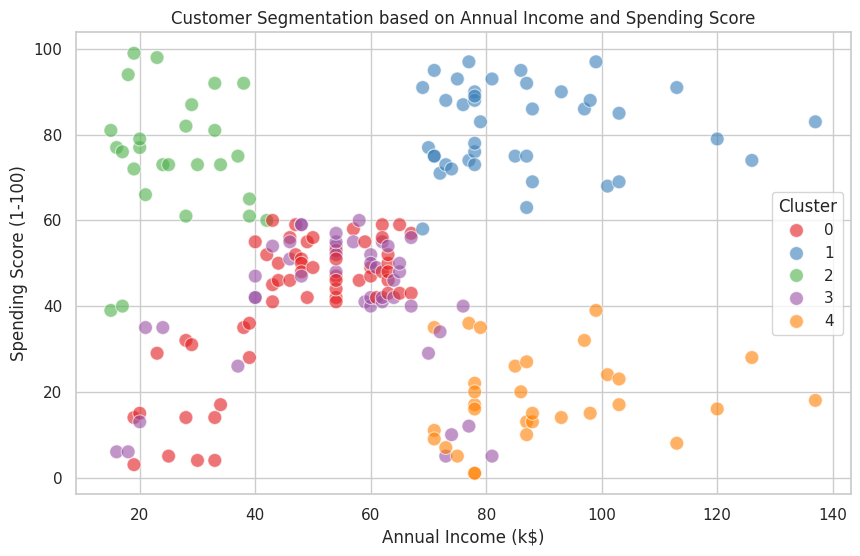

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mall_df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster_k5",
    palette="Set1",
    s=100,
    alpha=0.6
)
plt.title("Customer Segmentation based on Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()


In [ ]:
mall_df.to_csv('mall_clusters_info.csv')

<ipython-input-25-a821b9d63baf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mall_df, x="Cluster_k5", y=feature, palette="Set1")


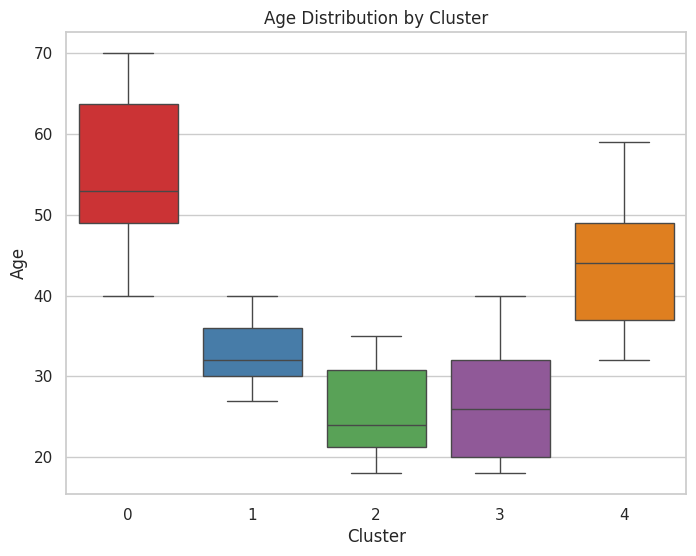

<ipython-input-25-a821b9d63baf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mall_df, x="Cluster_k5", y=feature, palette="Set1")


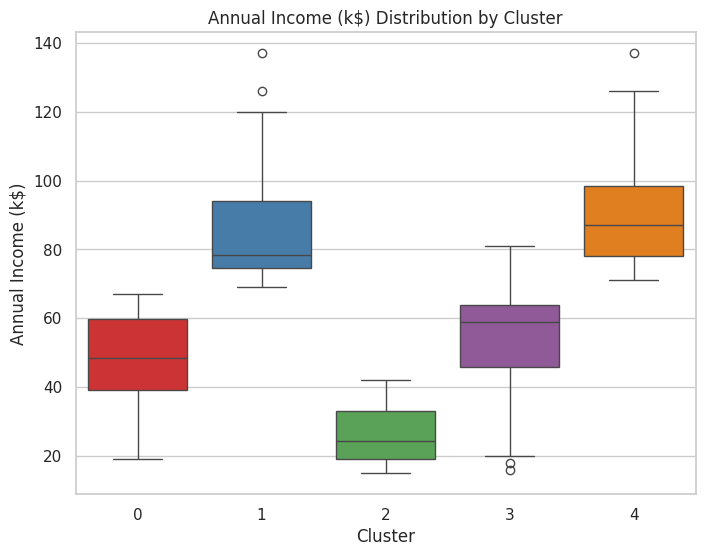

<ipython-input-25-a821b9d63baf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mall_df, x="Cluster_k5", y=feature, palette="Set1")


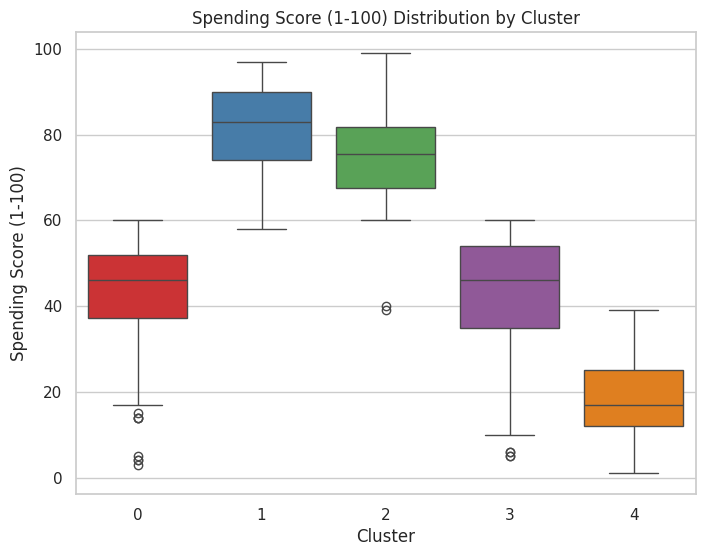

In [ ]:
# Box plots for Age, Annual Income, and Spending Score by Cluster
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=mall_df, x="Cluster_k5", y=feature, palette="Set1")
    plt.title(f"{feature} Distribution by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()


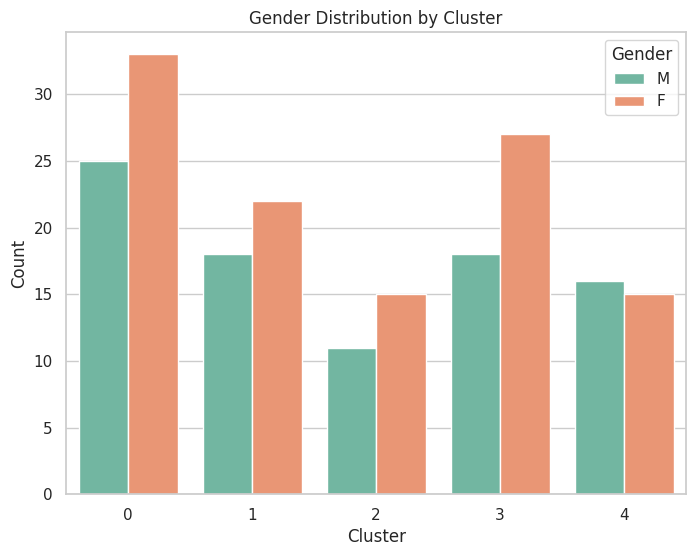

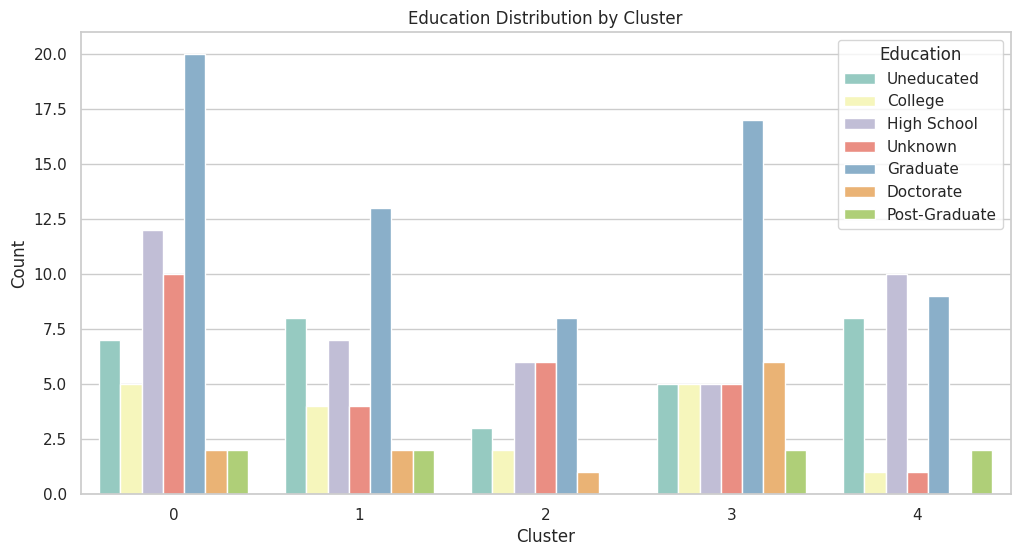

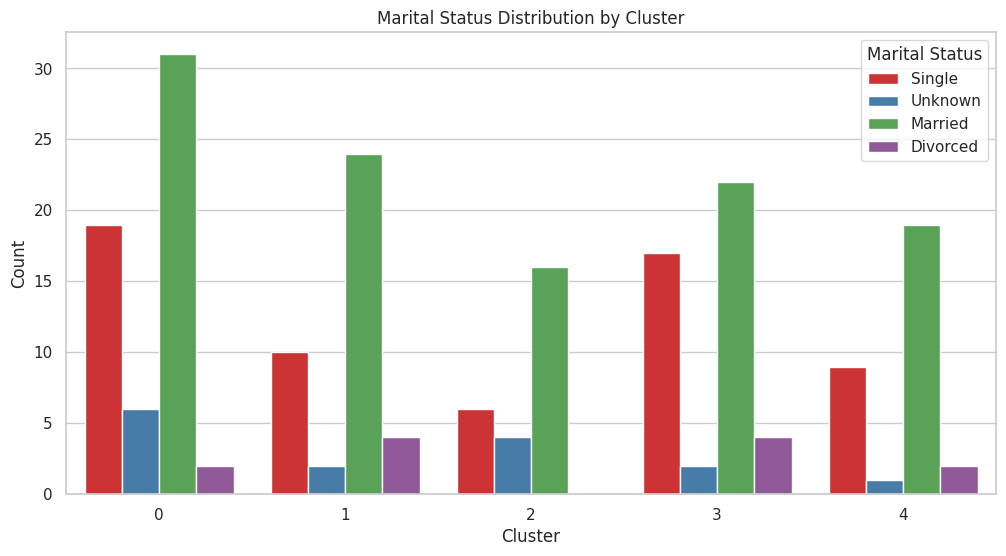

In [ ]:
# Count plot for Gender by Cluster
plt.figure(figsize=(8, 6))
sns.countplot(data=mall_df, x="Cluster_k5", hue="Gender", palette="Set2")
plt.title("Gender Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# Count plot for Education by Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=mall_df, x="Cluster_k5", hue="Education", palette="Set3")
plt.title("Education Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Education")
plt.show()

# Count plot for Marital Status by Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=mall_df, x="Cluster_k5", hue="Marital Status", palette="Set1")
plt.title("Marital Status Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()


## Inference from Clustering Results
* The analysis provided valuable insights into each customer segment, revealing differences in spending habits, income levels, and age distributions. The primary characteristics of each cluster are as follows:
### Cluster 0:
* Lower-income, older demographic with low spending scores. This group is price-sensitive and cautious with spending.
### Cluster 1:
* High-income, young adult segment with high spending scores. These customers are financially comfortable and inclined towards premium products.
### Cluster 2:
* Moderate-income group with high spending scores, indicating customers who prioritize value for money but are still willing to spend.
### Cluster 3:
* Low-income, younger customers with low spending scores, indicating budget-conscious behaviors.
### Cluster 4:
* Middle-aged, affluent customers with moderate spending. This segment is likely stable financially but cautious with high-value purchases.

### Each cluster reflects a distinct customer profile, allowing the business to better understand customer preferences and spending capacity.